## Stats 504: Practice and Communication in Applied Statistics
Overall goal: Prepare master-level statistics and data science students for collaborative, interdisciplinary work and research
Contributing skills:
- Formulate meaningful and tractable questions based on research goals and consistent with available data
- Devise, document, and implement analysis strategies
- Communicate findings through prose and visuals
- Leverage knowledge of statistical foundations and theory when engaging in applied research
- Understand the capabilities and limitations of statistical methods
- Understand the value and limitations of different types of data
- Interpret of analytic results for a general audience
- Develop data manipulation and computing skills, especially for large and complex data sets
- Build knowledge about several applied research areas where data-driven investigation plays a major role
- What are some skills you would like to learn in this course?

## About me
- Worked at a master-level biostatistician for 5 years in HIV/STI research
- Did a joint PhD in Engineering and Public Policy and in Statistics and Data Science
- Thesis topic on non-parametric causal discovery and sexually transmitted infection prevention
- Co-taught this course last semester for first time
- In my experience, there was a big jump from me doing my MS in biostats to work
 - 60% data formatting and cleaning
 - Collaborators expected me to also be an expert in HIV/STI, present at conferences
 - Needed to use methods I never learned before
 - Communicate statistical material with non-statistical experts
 - Gave me some real-world statistical background before my PhD

## Course Layout
- Case studies
 - research question
 - dataset
 - methodology
  - some theory
  - Reproducible code
- Homework
 - attempts to simulate work experience
 - 2-3 page, well-written memo of finding for non-statistical audience
 - Memo layout:
  - Intro: Introduce topic, explain problem, what you are going to do
  - Describe method and purpose it serves
  - Explain data and results
  - Conclusion: how do these results answer question
 - [Writing tips](http://dept.stat.lsa.umich.edu/~kshedden/stats504/topics/writing_tips/)
 - include reproducible code (rmarkdown or jupyter notebook)
 - Reproducible code makes your work more transparent to others.  You will be required to submit your reproducible code: [Rmarkdown](https://rmarkdown.rstudio.com), [Jupyter notebook](https://jupyter.org)
 - [Jupyter notebook tutorial](https://www.dataquest.io/blog/jupyter-notebook-tutorial/), [Rmarkdown tutorial](https://r4ds.had.co.nz/r-markdown.html)
 - Course code will be in both python and R
 - Assignments will be given every two weeks and collected two weeks after issued
 - Assignments will be assess on writing quality, clarity, reproducible code, statistical correctness
- During class:
 - I will present with lecture notes
 - OK/encouraged to speak up with comments or questions
 - I will try to use zoom polling to gage class interest and understanding
 - 5% of grade based on class participation
 - I will record all lectures send on to individuals when requested
 - I would like you to keep your cameras on for most of the lecture if possible
 - Thoughts/Questions

#### Statistics vs Data Science/Machine Learning
- What's the difference?
- Which is more useful?
- What will we focus on in this class?

## Cyclist Crossing the Brooklyn Bridge
- The dataset below gives the number of bikes that cross the Brooklyn Bridge each day between 1 April 2017 and 31 October 2017
- We want to understand which variables are associated with the number of crossings
- Poll: Programming language?
- This lecture is in python but some will be in R as well
- It's ok if you're not familiar with python or shell command
- We will be using the following modules in python3
 - Note: the percent sign (%) in jupyter lets us run shell commands

In [2]:
%pip install pandas
%pip install statsmodels
%pip install numpy
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


importing the following modules

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

read in data and get month, day of week, and day from date

In [4]:
df = pd.read_csv('bike.csv', header=0, infer_datetime_format=True, parse_dates=[0], index_col=[0])
ds = df.index.to_series()
df['MONTH'] = ds.dt.month
df['DAY_OF_WEEK'] = ds.dt.dayofweek
df['DAY'] = ds.dt.day

Visually inspecting data

In [5]:
df.head(10)

,HIGH_T,LOW_T,PRECIP,BB_COUNT,MONTH,DAY_OF_WEEK,DAY
Date,,,,,,,
2017-04-01,46.0,37.0,0.00,606,4,5,1
2017-04-02,62.1,41.0,0.00,2021,4,6,2
2017-04-03,63.0,50.0,0.03,2470,4,0,3
2017-04-04,51.1,46.0,1.18,723,4,1,4
2017-04-05,63.0,46.0,0.00,2807,4,2,5
2017-04-06,48.9,41.0,0.73,461,4,3,6
2017-04-07,48.0,43.0,0.01,1222,4,4,7
2017-04-08,55.9,39.9,0.00,1674,4,5,8
2017-04-09,66.0,45.0,0.00,2375,4,6,9


Size of dataset: (rows, columns)

In [6]:
df.shape

(214, 7)

- Show the number of missing variables
- show means and st dev
- overall order statistics
- Frequently, applied papers will want to see a table giving mean (st dev) or medians (IQR)

In [7]:
df.describe()

,HIGH_T,LOW_T,PRECIP,BB_COUNT,MONTH,DAY_OF_WEEK,DAY
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,74.201869,62.027103,0.132430,2680.042056,7.009346,3.000000,15.789720
std,10.390443,9.305792,0.394004,854.710864,2.002324,2.016365,8.848102
min,46.000000,37.000000,0.000000,151.000000,4.000000,0.000000,1.000000
25%,66.900000,55.225000,0.000000,2298.000000,5.000000,1.000000,8.000000
50%,75.900000,64.000000,0.000000,2857.000000,7.000000,3.000000,16.000000
75%,82.000000,70.000000,0.037500,3285.000000,9.000000,5.000000,23.000000
max,93.900000,78.100000,3.030000,4960.000000,10.000000,6.000000,31.000000


#### Visual variable distributions
- Consider kinds of variables in the data
- Consider size of dataset (rows and columns)
- Look for anything strange in the data

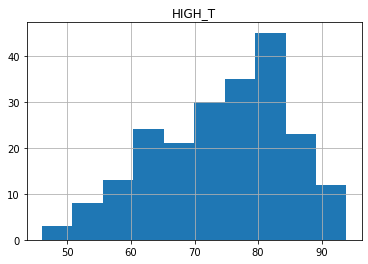

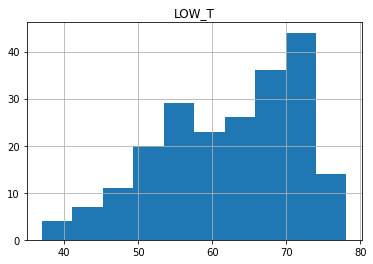

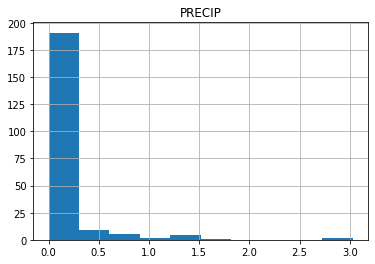

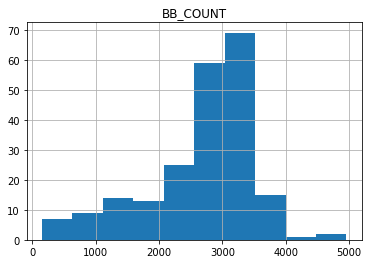

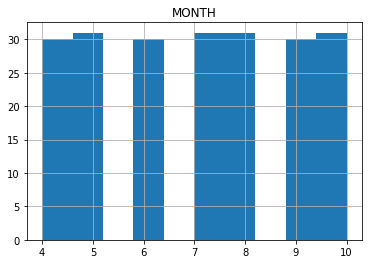

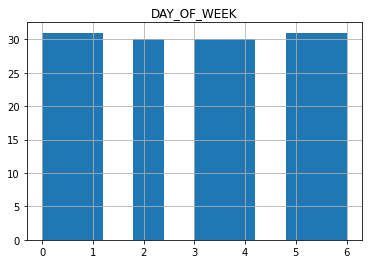

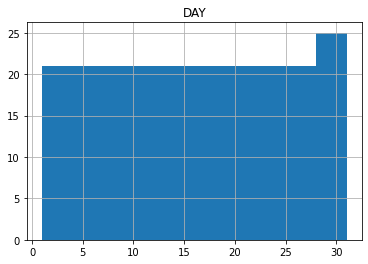

In [8]:
%matplotlib inline
df.columns
for var in df.columns:
    df.hist(column=var)

#### scatter plots

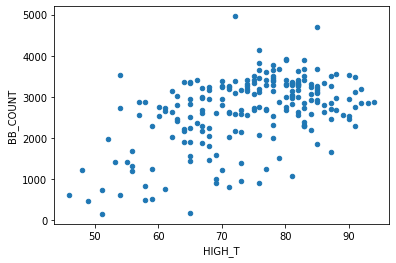

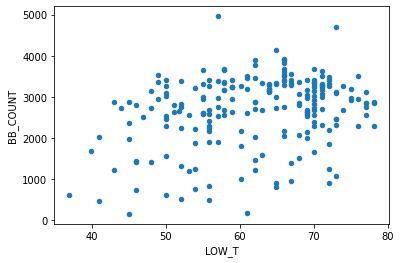

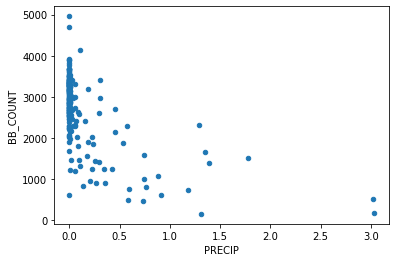

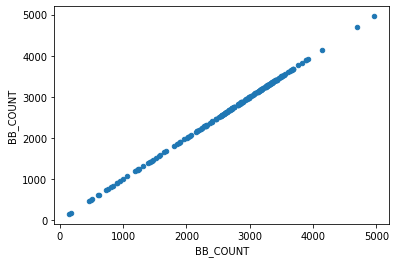

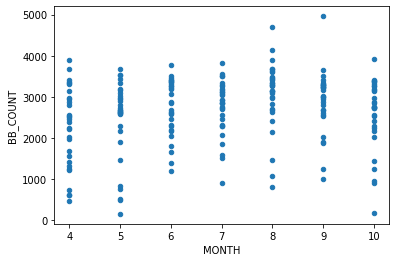

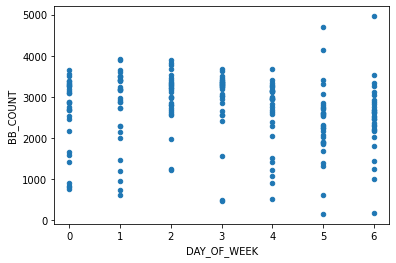

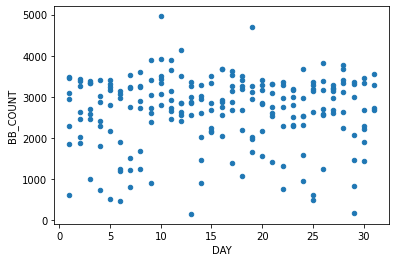

In [9]:
for var in df.columns:
    df.plot.scatter(x=var, y='BB_COUNT')

**Coding tip: DRY - Don't Repeat Yourself**

## Generalized Linear Models
- Robust class of models that are frequently used in classical statistics
- Models a function of conditional expectation as a linear function:
$$g(E[Y|X=x])=\beta_0+\beta_1x_1+\dots+\beta_px_p$$
- $g$ called a link function and should be invertible
$$E[Y|X=x]=g^{-1}(\beta_0+\beta_1x_1+\dots+\beta_px_p)$$
- Most common link functions are $g(x)=x$ and $g(x)=\log(x)$
- How is $g(E[Y|X=x])$ different from $E[g(Y)|X=x]$?
- Two examples:
 * *Gaussian linear model:* 
 * *Poisson log-linear mode:*
- In general, which model to use depends on the distribution of $Y$
- GLMs specify both conditional mean structure and conditional variance structure
 - example: $Y|X=x\sim \text{Poisson}(x)$ then $E[Y|X]=x$ and $\text{Var}[Y|X]=x$
 - Can we use a Poisson model if $E[Y|X]\neq\text{Var}[Y|X]$ in data?  Yes
 - Overdispersion: $\text{Var}[Y|X]=\phi E[Y|X]$ for $\phi\geq 0$
 - In general, data does not need to be perfect to use a model
- Common GLMs:
 - Binomial (logistic)
 - Poisson
 - Negative Binomial
 - Gaussian
 - Tweedie
- Which model should we try for the bike count data?

In [10]:
expr = 'BB_COUNT ~ DAY  + DAY_OF_WEEK + MONTH + HIGH_T + LOW_T + PRECIP'

bikePoisson = sm.GLM.from_formula(expr, data=df, family=sm.families.Poisson()).fit()
bikePoisson.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               BB_COUNT   No. Observations:                  214
Model:                            GLM   Df Residuals:                      207
Model Family:                 Poisson   Df Model:                            6
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15314.
Date:                Tue, 19 Jan 2021   Deviance:                       28563.
Time:                        11:41:02   Pearson chi2:                 2.83e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       7.0371      0.011    627.626      0.000       7.015       7.059
DAY             0.0006      0.000      4.031      0.000       0.000       0.001
DAY_OF_WEEK    -0.0226      0.001    -34.134      0.000      -0.024      -0.021
MONTH           0.0134      0.001     19.217      0.000       0.012       0.015
HIGH_T          0.0242      0.000     80.905      0.000       0.024       0.025
LOW_T          -0.0149      0.000    -45.539      0.000      -0.016      -0.014
PRECIP         -0.7770      0.007   -113.367      0.000      -0.790      -0.764
===============================================================================
"""

What might be wrong with this model?